In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import calendar
import string
from string import punctuation
from itertools import chain

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_selection import SelectPercentile, chi2, f_regression, f_classif

from sklearn import svm
from sklearn.utils import shuffle

df = pd.read_csv('cleaned_weather_data.csv', index_col=0, encoding='latin1')  #load Datafield csv
pd.options.mode.copy_on_write = True 


# Read and Understand the Dataset

In [3]:
df.shape

(7637, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7637 entries, Port of Spain, Trinidad, Trinidad And Tobago to Port of Spain, Trinidad, Trinidad And Tobago
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          7637 non-null   object 
 1   tempmax           7637 non-null   float64
 2   tempmin           7637 non-null   float64
 3   temp              7637 non-null   float64
 4   feelslikemax      7637 non-null   float64
 5   feelslikemin      7637 non-null   float64
 6   feelslike         7637 non-null   float64
 7   dew               7637 non-null   float64
 8   humidity          7637 non-null   float64
 9   precip            5841 non-null   float64
 10  precipprob        7637 non-null   int64  
 11  precipcover       7637 non-null   float64
 12  windspeed         7637 non-null   float64
 13  winddir           7607 non-null   float64
 14  sealevelpressure  7355 non-null   float64
 15  cloudcover 

In [5]:
df.head(10)   #shows the first 10 rows of the CSV to highlight what the data looks like


,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations
name,,,,,,,,,,,,,,,,,,,,,
"Port of Spain, Trinidad, Trinidad And Tobago",2000-01-01,87.9,71.7,80.0,94.4,71.7,82.7,72.0,78.0,NaN,...,NaN,NaN,NaN,2000-01-01T06:24:06,2000-01-01T17:54:48,0.83,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999
"Port of Spain, Trinidad, Trinidad And Tobago",2000-01-02,87.9,71.3,78.2,96.1,71.3,80.5,72.5,83.7,NaN,...,NaN,NaN,NaN,2000-01-02T06:24:30,2000-01-02T17:55:20,0.86,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999
"Port of Spain, Trinidad, Trinidad And Tobago",2000-01-03,89.7,73.5,79.3,95.0,73.5,81.2,71.6,78.6,NaN,...,NaN,NaN,NaN,2000-01-03T06:24:53,2000-01-03T17:55:53,0.90,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999
"Port of Spain, Trinidad, Trinidad And Tobago",2000-01-04,84.3,71.3,76.1,89.8,71.3,77.2,70.9,84.9,NaN,...,NaN,NaN,NaN,2000-01-04T06:25:16,2000-01-04T17:56:26,0.93,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,78970099999
"Port of Spain, Trinidad, Trinidad And Tobago",2000-01-05,81.2,73.1,76.1,86.7,73.1,76.5,73.9,93.0,NaN,...,NaN,NaN,NaN,2000-01-05T06:25:37,2000-01-05T17:56:59,0.96,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999
"Port of Spain, Trinidad, Trinidad And Tobago",2000-01-06,87.9,73.5,77.9,96.1,73.5,79.7,73.4,86.7,NaN,...,NaN,NaN,NaN,2000-01-06T06:25:58,2000-01-06T17:57:31,0.00,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999
"Port of Spain, Trinidad, Trinidad And Tobago",2000-01-07,87.5,73.5,77.3,92.9,73.5,78.4,71.5,83.4,NaN,...,NaN,NaN,NaN,2000-01-07T06:26:18,2000-01-07T17:58:04,0.03,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999
"Port of Spain, Trinidad, Trinidad And Tobago",2000-01-08,87.9,72.8,79.7,92.9,72.8,81.6,70.6,75.8,NaN,...,NaN,NaN,NaN,2000-01-08T06:26:38,2000-01-08T17:58:36,0.07,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999
"Port of Spain, Trinidad, Trinidad And Tobago",2000-01-09,87.9,71.7,78.5,95.4,71.7,81.3,72.3,82.3,NaN,...,NaN,NaN,NaN,2000-01-09T06:26:56,2000-01-09T17:59:09,0.10,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999


In [6]:
df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase
count,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,5841.000000,7637.000000,7637.000000,7637.000000,7607.000000,7355.00000,7637.000000,7635.000000,4018.000000,4018.000000,4018.000000,7637.000000
mean,89.018712,74.740016,80.686120,97.527000,74.745240,84.049849,73.453765,80.131793,0.186220,43.799921,5.225413,15.349758,92.630695,1012.59482,60.136651,7.109679,225.828571,19.502837,7.856396,0.482805
std,2.990240,2.307903,1.964805,4.983782,2.326527,3.392538,2.326326,6.116863,0.439652,49.617350,14.130285,4.611617,32.288826,1.54614,18.650294,1.017579,55.495058,4.789561,1.688909,0.288445
min,71.700000,37.300000,71.000000,71.700000,37.300000,71.000000,63.200000,57.200000,0.000000,0.000000,0.000000,0.000000,0.100000,1006.00000,17.500000,2.700000,0.000000,0.000000,0.000000,0.000000
25%,87.800000,73.400000,79.300000,94.200000,73.400000,81.500000,71.900000,75.700000,0.000000,0.000000,0.000000,12.800000,73.900000,1011.60000,43.500000,6.500000,194.025000,16.800000,7.000000,0.250000
50%,89.600000,75.200000,80.800000,97.800000,75.200000,84.100000,74.000000,79.800000,0.016000,0.000000,0.000000,15.000000,91.400000,1012.70000,58.300000,7.000000,236.400000,20.400000,8.000000,0.480000
75%,91.400000,76.700000,82.200000,100.600000,76.700000,86.600000,75.300000,84.500000,0.161000,100.000000,4.170000,17.200000,104.900000,1013.70000,77.100000,7.600000,269.000000,23.200000,9.000000,0.750000
max,138.100000,80.900000,86.200000,138.100000,87.000000,94.600000,78.200000,99.300000,6.142000,100.000000,100.000000,118.600000,360.000000,1017.60000,100.000000,16.800000,328.700000,28.200000,10.000000,0.980000


In [7]:
df.isna()   # returns all Null values, where Null = true.

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations
name,,,,,,,,,,,,,,,,,,,,,
"Port of Spain, Trinidad, Trinidad And Tobago",False,False,False,False,False,False,False,False,False,True,...,True,True,True,False,False,False,False,False,False,False
"Port of Spain, Trinidad, Trinidad And Tobago",False,False,False,False,False,False,False,False,False,True,...,True,True,True,False,False,False,False,False,False,False
"Port of Spain, Trinidad, Trinidad And Tobago",False,False,False,False,False,False,False,False,False,True,...,True,True,True,False,False,False,False,False,False,False
"Port of Spain, Trinidad, Trinidad And Tobago",False,False,False,False,False,False,False,False,False,True,...,True,True,True,False,False,False,False,False,False,False
"Port of Spain, Trinidad, Trinidad And Tobago",False,False,False,False,False,False,False,False,False,True,...,True,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Port of Spain, Trinidad, Trinidad And Tobago",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
"Port of Spain, Trinidad, Trinidad And Tobago",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
"Port of Spain, Trinidad, Trinidad And Tobago",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isna().sum()

datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip              1796
precipprob             0
precipcover            0
windspeed              0
winddir               30
sealevelpressure     282
cloudcover             0
visibility             2
solarradiation      3619
solarenergy         3619
uvindex             3619
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

In [9]:
for col in df.columns:
    print(col,df[col].nunique())

datetime 7637
tempmax 135
tempmin 96
temp 123
feelslikemax 272
feelslikemin 99
feelslike 198
dew 129
humidity 333
precip 590
precipprob 2
precipcover 25
windspeed 120
winddir 1102
sealevelpressure 101
cloudcover 698
visibility 96
solarradiation 1754
solarenergy 227
uvindex 11
sunrise 7637
sunset 7637
moonphase 96
conditions 5
description 33
icon 4
stations 13


# Basic Data Preprocessing

datetime converted into day, month, year.
Sunrise / sunset data convereted to just only contain time in 24 hour format.
Icon / Station / wind direction / sea pressure data was removed as deemed unncessary.
Tempratures converted to C from F.
Onehat Encoding for Condition.
Season Categroy added, converting it to Wet and Dry.
Precip converted from Inches to MM.


In [11]:
def convert_date(date):
    if isinstance(date, str): 
        parts = date.split('-')  
        year = parts[0]  
        month = int(parts[1].replace(',', ''))  
        day = int(parts[2]) 
        return day, month, year

df[[ 'day' , 'month', 'year']] = df ['datetime'].apply(lambda x: pd.Series(convert_date(x)))
df.drop(columns=['datetime'],inplace=True)
df.head(10)

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,sunrise,sunset,moonphase,conditions,description,icon,stations,day,month,year
name,,,,,,,,,,,,,,,,,,,,,
"Port of Spain, Trinidad, Trinidad And Tobago",87.9,71.7,80.0,94.4,71.7,82.7,72.0,78.0,NaN,0,...,2000-01-01T06:24:06,2000-01-01T17:54:48,0.83,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999,1,1,2000
"Port of Spain, Trinidad, Trinidad And Tobago",87.9,71.3,78.2,96.1,71.3,80.5,72.5,83.7,NaN,0,...,2000-01-02T06:24:30,2000-01-02T17:55:20,0.86,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999,2,1,2000
"Port of Spain, Trinidad, Trinidad And Tobago",89.7,73.5,79.3,95.0,73.5,81.2,71.6,78.6,NaN,0,...,2000-01-03T06:24:53,2000-01-03T17:55:53,0.90,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999,3,1,2000
"Port of Spain, Trinidad, Trinidad And Tobago",84.3,71.3,76.1,89.8,71.3,77.2,70.9,84.9,NaN,0,...,2000-01-04T06:25:16,2000-01-04T17:56:26,0.93,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,78970099999,4,1,2000
"Port of Spain, Trinidad, Trinidad And Tobago",81.2,73.1,76.1,86.7,73.1,76.5,73.9,93.0,NaN,0,...,2000-01-05T06:25:37,2000-01-05T17:56:59,0.96,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999,5,1,2000
"Port of Spain, Trinidad, Trinidad And Tobago",87.9,73.5,77.9,96.1,73.5,79.7,73.4,86.7,NaN,0,...,2000-01-06T06:25:58,2000-01-06T17:57:31,0.00,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999,6,1,2000
"Port of Spain, Trinidad, Trinidad And Tobago",87.5,73.5,77.3,92.9,73.5,78.4,71.5,83.4,NaN,0,...,2000-01-07T06:26:18,2000-01-07T17:58:04,0.03,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999,7,1,2000
"Port of Spain, Trinidad, Trinidad And Tobago",87.9,72.8,79.7,92.9,72.8,81.6,70.6,75.8,NaN,0,...,2000-01-08T06:26:38,2000-01-08T17:58:36,0.07,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999,8,1,2000
"Port of Spain, Trinidad, Trinidad And Tobago",87.9,71.7,78.5,95.4,71.7,81.3,72.3,82.3,NaN,0,...,2000-01-09T06:26:56,2000-01-09T17:59:09,0.10,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999,9,1,2000


In [12]:
def convert_sunset(date):
        parts = date.split('T')  
        sunset_time = (parts[1]) 
        return sunset_time

df[[ 'sunset_time']] = df ['sunset'].apply(lambda x: pd.Series(convert_sunset(x)))
df.drop(columns=['sunset'],inplace=True)
df.head(10)

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,sunrise,moonphase,conditions,description,icon,stations,day,month,year,sunset_time
name,,,,,,,,,,,,,,,,,,,,,
"Port of Spain, Trinidad, Trinidad And Tobago",87.9,71.7,80.0,94.4,71.7,82.7,72.0,78.0,NaN,0,...,2000-01-01T06:24:06,0.83,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999,1,1,2000,17:54:48
"Port of Spain, Trinidad, Trinidad And Tobago",87.9,71.3,78.2,96.1,71.3,80.5,72.5,83.7,NaN,0,...,2000-01-02T06:24:30,0.86,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999,2,1,2000,17:55:20
"Port of Spain, Trinidad, Trinidad And Tobago",89.7,73.5,79.3,95.0,73.5,81.2,71.6,78.6,NaN,0,...,2000-01-03T06:24:53,0.90,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999,3,1,2000,17:55:53
"Port of Spain, Trinidad, Trinidad And Tobago",84.3,71.3,76.1,89.8,71.3,77.2,70.9,84.9,NaN,0,...,2000-01-04T06:25:16,0.93,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,78970099999,4,1,2000,17:56:26
"Port of Spain, Trinidad, Trinidad And Tobago",81.2,73.1,76.1,86.7,73.1,76.5,73.9,93.0,NaN,0,...,2000-01-05T06:25:37,0.96,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999,5,1,2000,17:56:59
"Port of Spain, Trinidad, Trinidad And Tobago",87.9,73.5,77.9,96.1,73.5,79.7,73.4,86.7,NaN,0,...,2000-01-06T06:25:58,0.00,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999,6,1,2000,17:57:31
"Port of Spain, Trinidad, Trinidad And Tobago",87.5,73.5,77.3,92.9,73.5,78.4,71.5,83.4,NaN,0,...,2000-01-07T06:26:18,0.03,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999,7,1,2000,17:58:04
"Port of Spain, Trinidad, Trinidad And Tobago",87.9,72.8,79.7,92.9,72.8,81.6,70.6,75.8,NaN,0,...,2000-01-08T06:26:38,0.07,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999,8,1,2000,17:58:36
"Port of Spain, Trinidad, Trinidad And Tobago",87.9,71.7,78.5,95.4,71.7,81.3,72.3,82.3,NaN,0,...,2000-01-09T06:26:56,0.10,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999,9,1,2000,17:59:09


In [13]:
def convert_sunrise(date):
        parts = date.split('T')  
        sunrise_time = (parts[1]) 
        return sunrise_time

df[[ 'sunrise_time']] = df ['sunrise'].apply(lambda x: pd.Series(convert_sunset(x)))
df.drop(columns=['sunrise'],inplace=True)
df.head(10)

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,moonphase,conditions,description,icon,stations,day,month,year,sunset_time,sunrise_time
name,,,,,,,,,,,,,,,,,,,,,
"Port of Spain, Trinidad, Trinidad And Tobago",87.9,71.7,80.0,94.4,71.7,82.7,72.0,78.0,NaN,0,...,0.83,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999,1,1,2000,17:54:48,06:24:06
"Port of Spain, Trinidad, Trinidad And Tobago",87.9,71.3,78.2,96.1,71.3,80.5,72.5,83.7,NaN,0,...,0.86,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999,2,1,2000,17:55:20,06:24:30
"Port of Spain, Trinidad, Trinidad And Tobago",89.7,73.5,79.3,95.0,73.5,81.2,71.6,78.6,NaN,0,...,0.90,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999,3,1,2000,17:55:53,06:24:53
"Port of Spain, Trinidad, Trinidad And Tobago",84.3,71.3,76.1,89.8,71.3,77.2,70.9,84.9,NaN,0,...,0.93,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,78970099999,4,1,2000,17:56:26,06:25:16
"Port of Spain, Trinidad, Trinidad And Tobago",81.2,73.1,76.1,86.7,73.1,76.5,73.9,93.0,NaN,0,...,0.96,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999,5,1,2000,17:56:59,06:25:37
"Port of Spain, Trinidad, Trinidad And Tobago",87.9,73.5,77.9,96.1,73.5,79.7,73.4,86.7,NaN,0,...,0.00,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999,6,1,2000,17:57:31,06:25:58
"Port of Spain, Trinidad, Trinidad And Tobago",87.5,73.5,77.3,92.9,73.5,78.4,71.5,83.4,NaN,0,...,0.03,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999,7,1,2000,17:58:04,06:26:18
"Port of Spain, Trinidad, Trinidad And Tobago",87.9,72.8,79.7,92.9,72.8,81.6,70.6,75.8,NaN,0,...,0.07,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999,8,1,2000,17:58:36,06:26:38
"Port of Spain, Trinidad, Trinidad And Tobago",87.9,71.7,78.5,95.4,71.7,81.3,72.3,82.3,NaN,0,...,0.10,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,78970099999,9,1,2000,17:59:09,06:26:56


In [14]:
df.drop(columns=['icon'],inplace=True)
df.drop(columns=['stations'],inplace=True)
df.drop(columns=['winddir'],inplace=True)
df.drop(columns=['sealevelpressure'],inplace=True)
df.head(10)

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,solarenergy,uvindex,moonphase,conditions,description,day,month,year,sunset_time,sunrise_time
name,,,,,,,,,,,,,,,,,,,,,
"Port of Spain, Trinidad, Trinidad And Tobago",87.9,71.7,80.0,94.4,71.7,82.7,72.0,78.0,NaN,0,...,NaN,NaN,0.83,Partially cloudy,Partly cloudy throughout the day.,1,1,2000,17:54:48,06:24:06
"Port of Spain, Trinidad, Trinidad And Tobago",87.9,71.3,78.2,96.1,71.3,80.5,72.5,83.7,NaN,0,...,NaN,NaN,0.86,Partially cloudy,Partly cloudy throughout the day.,2,1,2000,17:55:20,06:24:30
"Port of Spain, Trinidad, Trinidad And Tobago",89.7,73.5,79.3,95.0,73.5,81.2,71.6,78.6,NaN,0,...,NaN,NaN,0.90,Partially cloudy,Partly cloudy throughout the day.,3,1,2000,17:55:53,06:24:53
"Port of Spain, Trinidad, Trinidad And Tobago",84.3,71.3,76.1,89.8,71.3,77.2,70.9,84.9,NaN,0,...,NaN,NaN,0.93,Partially cloudy,Clearing in the afternoon.,4,1,2000,17:56:26,06:25:16
"Port of Spain, Trinidad, Trinidad And Tobago",81.2,73.1,76.1,86.7,73.1,76.5,73.9,93.0,NaN,0,...,NaN,NaN,0.96,Partially cloudy,Partly cloudy throughout the day.,5,1,2000,17:56:59,06:25:37
"Port of Spain, Trinidad, Trinidad And Tobago",87.9,73.5,77.9,96.1,73.5,79.7,73.4,86.7,NaN,0,...,NaN,NaN,0.00,Partially cloudy,Partly cloudy throughout the day.,6,1,2000,17:57:31,06:25:58
"Port of Spain, Trinidad, Trinidad And Tobago",87.5,73.5,77.3,92.9,73.5,78.4,71.5,83.4,NaN,0,...,NaN,NaN,0.03,Partially cloudy,Partly cloudy throughout the day.,7,1,2000,17:58:04,06:26:18
"Port of Spain, Trinidad, Trinidad And Tobago",87.9,72.8,79.7,92.9,72.8,81.6,70.6,75.8,NaN,0,...,NaN,NaN,0.07,Partially cloudy,Partly cloudy throughout the day.,8,1,2000,17:58:36,06:26:38
"Port of Spain, Trinidad, Trinidad And Tobago",87.9,71.7,78.5,95.4,71.7,81.3,72.3,82.3,NaN,0,...,NaN,NaN,0.10,Partially cloudy,Partly cloudy throughout the day.,9,1,2000,17:59:09,06:26:56


In [15]:
def inches_to_mm(inches):
    return inches * 25.4

df[[ 'precip']] = df ['precip'].apply(lambda x: pd.Series(inches_to_mm(x)))



In [16]:
def fahrenheit_to_celsius(fahrenheit):
    celsius = (fahrenheit - 32) * 5 / 9
    return celsius


df[[ 'tempmax']] = df ['tempmax'].apply(lambda x: pd.Series(fahrenheit_to_celsius(x)))
df[[ 'tempmin']] = df ['tempmin'].apply(lambda x: pd.Series(fahrenheit_to_celsius(x)))
df[[ 'avg_temp']] = df ['temp'].apply(lambda x: pd.Series(fahrenheit_to_celsius(x)))

df[[ 'feelslikemax']] = df ['feelslikemax'].apply(lambda x: pd.Series(fahrenheit_to_celsius(x)))
df[[ 'feelslikemin']] = df ['feelslikemin'].apply(lambda x: pd.Series(fahrenheit_to_celsius(x)))
df[[ 'avg_feelsliketemp']] = df ['feelslike'].apply(lambda x: pd.Series(fahrenheit_to_celsius(x)))

df[[ 'dew_point']] = df ['dew'].apply(lambda x: pd.Series(fahrenheit_to_celsius(x)))



df.drop(columns=['temp'],inplace=True)
df.drop(columns=['feelslike'],inplace=True)
df.drop(columns=['dew'],inplace=True)

df.head(10)

,tempmax,tempmin,feelslikemax,feelslikemin,humidity,precip,precipprob,precipcover,windspeed,cloudcover,...,conditions,description,day,month,year,sunset_time,sunrise_time,avg_temp,avg_feelsliketemp,dew_point
name,,,,,,,,,,,,,,,,,,,,,
"Port of Spain, Trinidad, Trinidad And Tobago",31.055556,22.055556,34.666667,22.055556,78.0,NaN,0,0.0,15.0,43.8,...,Partially cloudy,Partly cloudy throughout the day.,1,1,2000,17:54:48,06:24:06,26.666667,28.166667,22.222222
"Port of Spain, Trinidad, Trinidad And Tobago",31.055556,21.833333,35.611111,21.833333,83.7,NaN,0,0.0,16.1,57.9,...,Partially cloudy,Partly cloudy throughout the day.,2,1,2000,17:55:20,06:24:30,25.666667,26.944444,22.500000
"Port of Spain, Trinidad, Trinidad And Tobago",32.055556,23.055556,35.000000,23.055556,78.6,NaN,0,0.0,12.8,73.2,...,Partially cloudy,Partly cloudy throughout the day.,3,1,2000,17:55:53,06:24:53,26.277778,27.333333,22.000000
"Port of Spain, Trinidad, Trinidad And Tobago",29.055556,21.833333,32.111111,21.833333,84.9,NaN,0,0.0,13.9,77.7,...,Partially cloudy,Clearing in the afternoon.,4,1,2000,17:56:26,06:25:16,24.500000,25.111111,21.611111
"Port of Spain, Trinidad, Trinidad And Tobago",27.333333,22.833333,30.388889,22.833333,93.0,NaN,0,0.0,11.4,76.0,...,Partially cloudy,Partly cloudy throughout the day.,5,1,2000,17:56:59,06:25:37,24.500000,24.722222,23.277778
"Port of Spain, Trinidad, Trinidad And Tobago",31.055556,23.055556,35.611111,23.055556,86.7,NaN,0,0.0,18.3,80.0,...,Partially cloudy,Partly cloudy throughout the day.,6,1,2000,17:57:31,06:25:58,25.500000,26.500000,23.000000
"Port of Spain, Trinidad, Trinidad And Tobago",30.833333,23.055556,33.833333,23.055556,83.4,NaN,0,0.0,15.0,64.2,...,Partially cloudy,Partly cloudy throughout the day.,7,1,2000,17:58:04,06:26:18,25.166667,25.777778,21.944444
"Port of Spain, Trinidad, Trinidad And Tobago",31.055556,22.666667,33.833333,22.666667,75.8,NaN,0,0.0,13.9,42.2,...,Partially cloudy,Partly cloudy throughout the day.,8,1,2000,17:58:36,06:26:38,26.500000,27.555556,21.444444
"Port of Spain, Trinidad, Trinidad And Tobago",31.055556,22.055556,35.222222,22.055556,82.3,NaN,0,0.0,16.1,51.4,...,Partially cloudy,Partly cloudy throughout the day.,9,1,2000,17:59:09,06:26:56,25.833333,27.388889,22.388889


In [17]:
one_hat_license = pd.get_dummies(df['conditions'])
one_hat_license = one_hat_license.astype(int)
df = pd.concat([df, one_hat_license], axis=1)

df.drop(columns=['conditions'], inplace=True)
df.head(10)

,tempmax,tempmin,feelslikemax,feelslikemin,humidity,precip,precipprob,precipcover,windspeed,cloudcover,...,sunset_time,sunrise_time,avg_temp,avg_feelsliketemp,dew_point,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy"
name,,,,,,,,,,,,,,,,,,,,,
"Port of Spain, Trinidad, Trinidad And Tobago",31.055556,22.055556,34.666667,22.055556,78.0,NaN,0,0.0,15.0,43.8,...,17:54:48,06:24:06,26.666667,28.166667,22.222222,0,1,0,0,0
"Port of Spain, Trinidad, Trinidad And Tobago",31.055556,21.833333,35.611111,21.833333,83.7,NaN,0,0.0,16.1,57.9,...,17:55:20,06:24:30,25.666667,26.944444,22.500000,0,1,0,0,0
"Port of Spain, Trinidad, Trinidad And Tobago",32.055556,23.055556,35.000000,23.055556,78.6,NaN,0,0.0,12.8,73.2,...,17:55:53,06:24:53,26.277778,27.333333,22.000000,0,1,0,0,0
"Port of Spain, Trinidad, Trinidad And Tobago",29.055556,21.833333,32.111111,21.833333,84.9,NaN,0,0.0,13.9,77.7,...,17:56:26,06:25:16,24.500000,25.111111,21.611111,0,1,0,0,0
"Port of Spain, Trinidad, Trinidad And Tobago",27.333333,22.833333,30.388889,22.833333,93.0,NaN,0,0.0,11.4,76.0,...,17:56:59,06:25:37,24.500000,24.722222,23.277778,0,1,0,0,0
"Port of Spain, Trinidad, Trinidad And Tobago",31.055556,23.055556,35.611111,23.055556,86.7,NaN,0,0.0,18.3,80.0,...,17:57:31,06:25:58,25.500000,26.500000,23.000000,0,1,0,0,0
"Port of Spain, Trinidad, Trinidad And Tobago",30.833333,23.055556,33.833333,23.055556,83.4,NaN,0,0.0,15.0,64.2,...,17:58:04,06:26:18,25.166667,25.777778,21.944444,0,1,0,0,0
"Port of Spain, Trinidad, Trinidad And Tobago",31.055556,22.666667,33.833333,22.666667,75.8,NaN,0,0.0,13.9,42.2,...,17:58:36,06:26:38,26.500000,27.555556,21.444444,0,1,0,0,0
"Port of Spain, Trinidad, Trinidad And Tobago",31.055556,22.055556,35.222222,22.055556,82.3,NaN,0,0.0,16.1,51.4,...,17:59:09,06:26:56,25.833333,27.388889,22.388889,0,1,0,0,0


In [18]:
def season_split(x):
    if x<=6:
        return "Dry"
    else:
        return "Wet"


df[[ 'season']] = df ['month'].apply(lambda x: pd.Series(season_split(x)))
df.head(10)

,tempmax,tempmin,feelslikemax,feelslikemin,humidity,precip,precipprob,precipcover,windspeed,cloudcover,...,sunrise_time,avg_temp,avg_feelsliketemp,dew_point,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",season
name,,,,,,,,,,,,,,,,,,,,,
"Port of Spain, Trinidad, Trinidad And Tobago",31.055556,22.055556,34.666667,22.055556,78.0,NaN,0,0.0,15.0,43.8,...,06:24:06,26.666667,28.166667,22.222222,0,1,0,0,0,Dry
"Port of Spain, Trinidad, Trinidad And Tobago",31.055556,21.833333,35.611111,21.833333,83.7,NaN,0,0.0,16.1,57.9,...,06:24:30,25.666667,26.944444,22.500000,0,1,0,0,0,Dry
"Port of Spain, Trinidad, Trinidad And Tobago",32.055556,23.055556,35.000000,23.055556,78.6,NaN,0,0.0,12.8,73.2,...,06:24:53,26.277778,27.333333,22.000000,0,1,0,0,0,Dry
"Port of Spain, Trinidad, Trinidad And Tobago",29.055556,21.833333,32.111111,21.833333,84.9,NaN,0,0.0,13.9,77.7,...,06:25:16,24.500000,25.111111,21.611111,0,1,0,0,0,Dry
"Port of Spain, Trinidad, Trinidad And Tobago",27.333333,22.833333,30.388889,22.833333,93.0,NaN,0,0.0,11.4,76.0,...,06:25:37,24.500000,24.722222,23.277778,0,1,0,0,0,Dry
"Port of Spain, Trinidad, Trinidad And Tobago",31.055556,23.055556,35.611111,23.055556,86.7,NaN,0,0.0,18.3,80.0,...,06:25:58,25.500000,26.500000,23.000000,0,1,0,0,0,Dry
"Port of Spain, Trinidad, Trinidad And Tobago",30.833333,23.055556,33.833333,23.055556,83.4,NaN,0,0.0,15.0,64.2,...,06:26:18,25.166667,25.777778,21.944444,0,1,0,0,0,Dry
"Port of Spain, Trinidad, Trinidad And Tobago",31.055556,22.666667,33.833333,22.666667,75.8,NaN,0,0.0,13.9,42.2,...,06:26:38,26.500000,27.555556,21.444444,0,1,0,0,0,Dry
"Port of Spain, Trinidad, Trinidad And Tobago",31.055556,22.055556,35.222222,22.055556,82.3,NaN,0,0.0,16.1,51.4,...,06:26:56,25.833333,27.388889,22.388889,0,1,0,0,0,Dry


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7637 entries, Port of Spain, Trinidad, Trinidad And Tobago to Port of Spain, Trinidad, Trinidad And Tobago
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tempmax                 7637 non-null   float64
 1   tempmin                 7637 non-null   float64
 2   feelslikemax            7637 non-null   float64
 3   feelslikemin            7637 non-null   float64
 4   humidity                7637 non-null   float64
 5   precip                  5841 non-null   float64
 6   precipprob              7637 non-null   int64  
 7   precipcover             7637 non-null   float64
 8   windspeed               7637 non-null   float64
 9   cloudcover              7637 non-null   float64
 10  visibility              7635 non-null   float64
 11  solarradiation          4018 non-null   float64
 12  solarenergy             4018 non-null   float64
 13  uvindex        

In [20]:
for col in df.columns:
    print(col,df[col].nunique())

tempmax 135
tempmin 96
feelslikemax 272
feelslikemin 99
humidity 333
precip 590
precipprob 2
precipcover 25
windspeed 120
cloudcover 698
visibility 96
solarradiation 1754
solarenergy 227
uvindex 11
moonphase 96
description 33
day 31
month 12
year 21
sunset_time 2518
sunrise_time 2382
avg_temp 123
avg_feelsliketemp 198
dew_point 129
Overcast 2
Partially cloudy 2
Rain 2
Rain, Overcast 2
Rain, Partially cloudy 2
season 2


In [21]:
df.isna().sum()

tempmax                      0
tempmin                      0
feelslikemax                 0
feelslikemin                 0
humidity                     0
precip                    1796
precipprob                   0
precipcover                  0
windspeed                    0
cloudcover                   0
visibility                   2
solarradiation            3619
solarenergy               3619
uvindex                   3619
moonphase                    0
description                  0
day                          0
month                        0
year                         0
sunset_time                  0
sunrise_time                 0
avg_temp                     0
avg_feelsliketemp            0
dew_point                    0
Overcast                     0
Partially cloudy             0
Rain                         0
Rain, Overcast               0
Rain, Partially cloudy       0
season                       0
dtype: int64

In [22]:
df.to_csv("refined_data.csv")

## Visualizations of Dataset

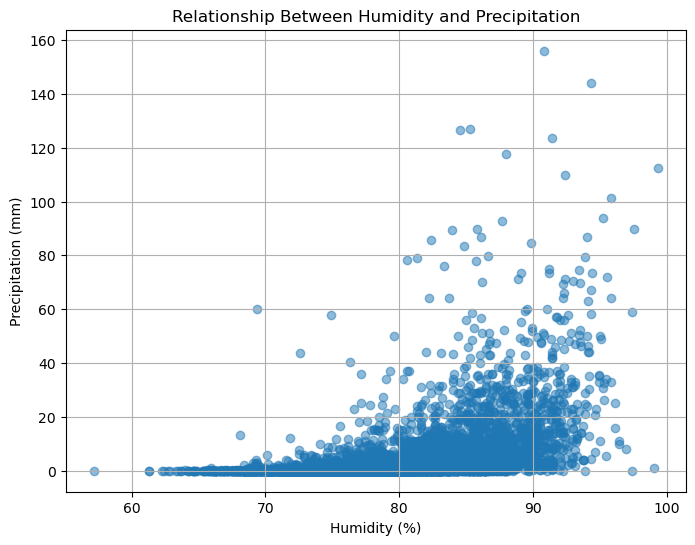

In [45]:
# Scatter plot for humidity vs precipitation
plt.figure(figsize=(8, 6))
plt.scatter(data['humidity'], data['precip'], alpha=0.5)
plt.xlabel('Humidity (%)')
plt.ylabel('Precipitation (mm)')
plt.title('Relationship Between Humidity and Precipitation')
plt.grid(True)
plt.show()

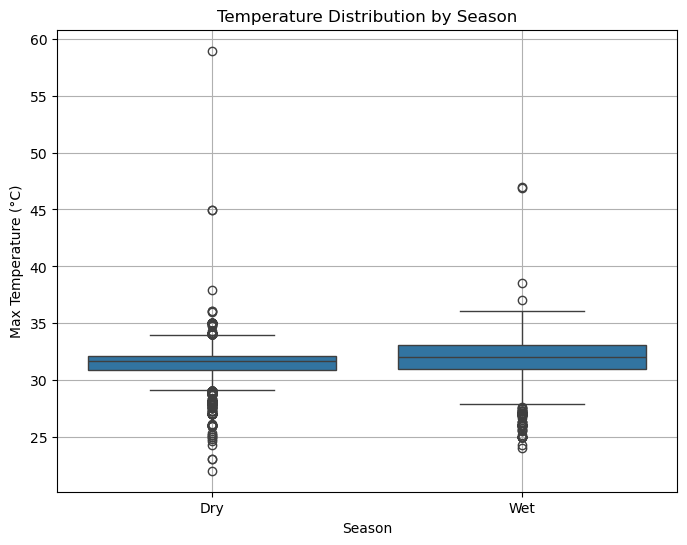

In [49]:
# Box plot for tempmax across seasons
plt.figure(figsize=(8, 6))
sns.boxplot(x='season', y='tempmax', data=data)
plt.xlabel('Season')
plt.ylabel('Max Temperature (°C)')
plt.title('Temperature Distribution by Season')
plt.grid(True)
plt.show()

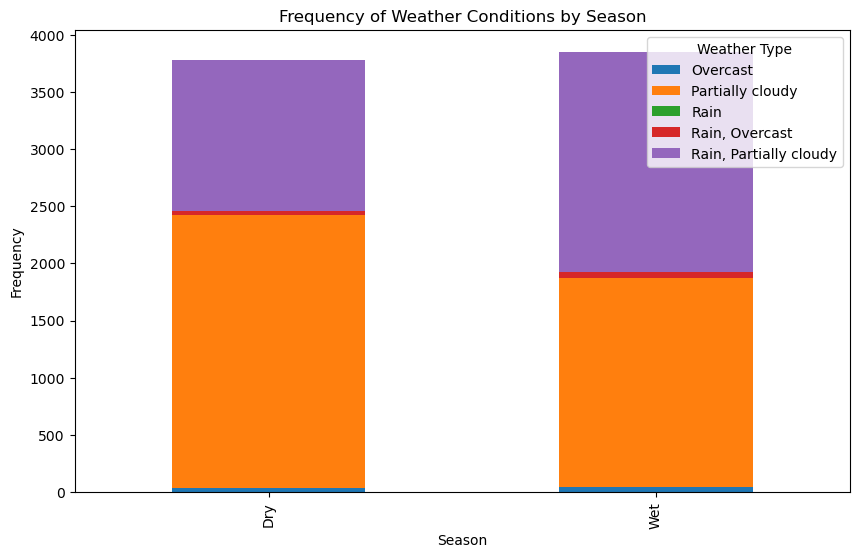

In [51]:
# Stacked bar chart for weather descriptions across seasons
weather_categories = ['Overcast', 'Partially cloudy', 'Rain', 'Rain, Overcast', 'Rain, Partially cloudy']
weather_data = data[weather_categories].groupby(data['season']).sum()

weather_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.title('Frequency of Weather Conditions by Season')
plt.legend(title='Weather Type')
plt.show()

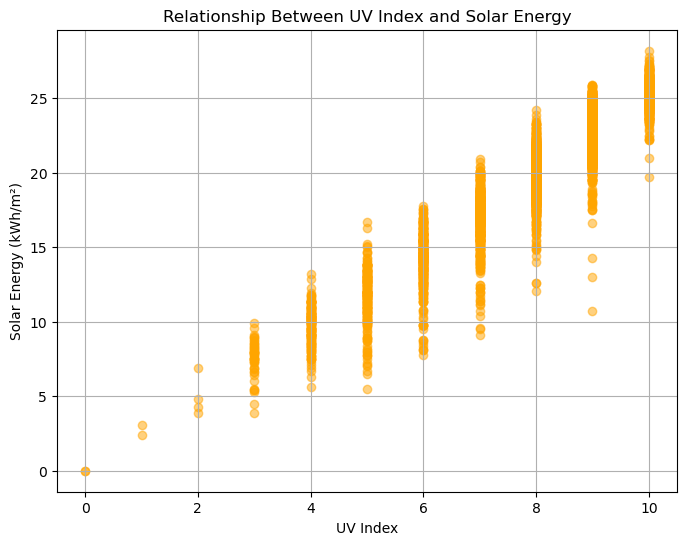

In [55]:
# Scatter plot for UV Index vs Solar Energy
plt.figure(figsize=(8, 6))
plt.scatter(data['uvindex'], data['solarenergy'], alpha=0.5, color='orange')
plt.xlabel('UV Index')
plt.ylabel('Solar Energy (kWh/m²)')
plt.title('Relationship Between UV Index and Solar Energy')
plt.grid(True)
plt.show()

## Test Model

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv("refined_data.csv")

# Define features and target
features = ['tempmax', 'tempmin', 'humidity', 'precipprob', 'windspeed', 
            'cloudcover', 'solarenergy', 'season', 'description']  # Include categorical columns
target = 'precip'

X = data[features]
y = data[target]

# Handle missing values in target variable 'y'
y = y.fillna(y.mean())  # Replace NaN in target variable with mean (or choose another strategy)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separate numeric and categorical columns
numeric_features = ['tempmax', 'tempmin', 'humidity', 'precipprob', 'windspeed', 
                    'cloudcover', 'solarenergy']
categorical_features = ['season', 'description']

# Create transformers for preprocessing
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values in numeric columns
    ('scaler', StandardScaler())                 # Scale numeric features
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values in categorical columns
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))  # Handle unknown categories
])

# Combine preprocessors into a column transformer
preprocessor = ColumnTransformer([
    ('numeric', numeric_transformer, numeric_features),
    ('categorical', categorical_transformer, categorical_features)
])

# Create the full pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict using the pipeline
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Display first few predictions alongside actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

Mean Squared Error: 70.35273758175684
R-squared: 0.26224174942563383
         Actual  Predicted
683    4.729988   5.015752
4457  24.892000  16.420246
2457  29.006800   6.641808
2598   0.000000  -0.154754
7037   1.600200   8.825230


C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


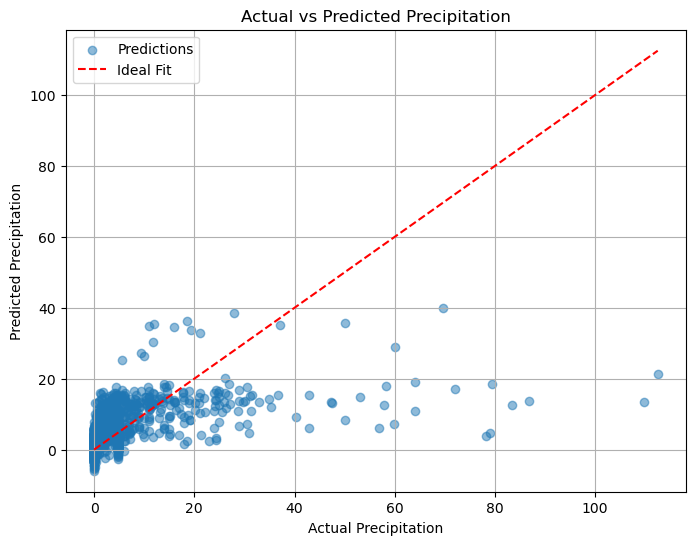

In [37]:
# Scatter plot for actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal Fit")
plt.xlabel("Actual Precipitation")
plt.ylabel("Predicted Precipitation")
plt.title("Actual vs Predicted Precipitation")
plt.legend()
plt.grid(True)
plt.show()

Residual Plot shows the difference between actual values and predicted values (residuals = actual - predicted).

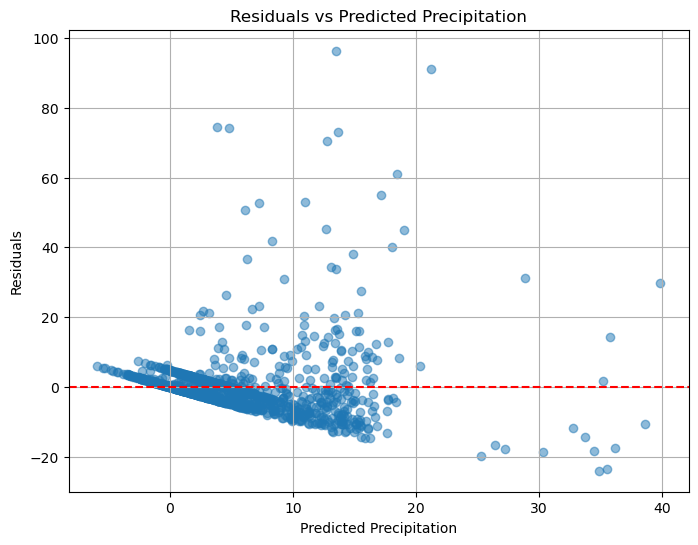

In [39]:
# Residual plot
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Precipitation")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Precipitation")
plt.grid(True)
plt.show()

Histogram showing the distribution of residuals, helping to assess whether they are normally distributed.

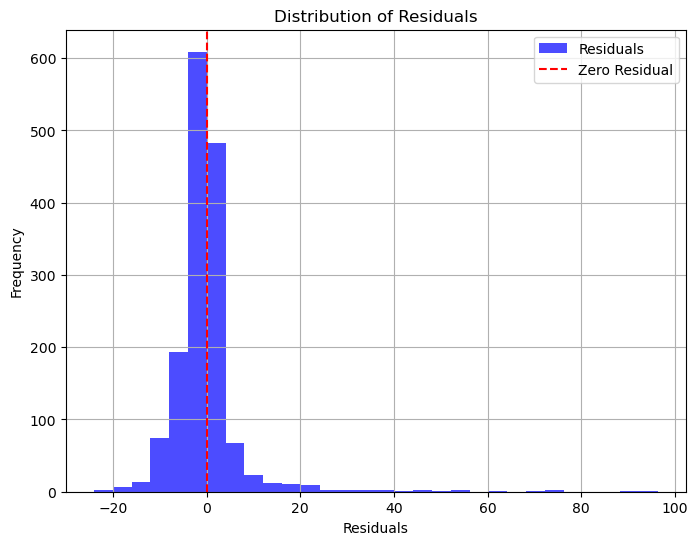

In [41]:
# Histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, alpha=0.7, color="blue", label="Residuals")
plt.axvline(x=0, color='red', linestyle='--', label="Zero Residual")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.legend()
plt.grid(True)
plt.show()